In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Reseau avec 1 neurone

##Initialisation

In [ ]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

##Model

In [ ]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

##Fonction

In [ ]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

##Gradients

In [ ]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

##Mise en jour

In [ ]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

##Prediction

In [ ]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

##Construction du neurone Artificielle

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

##Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


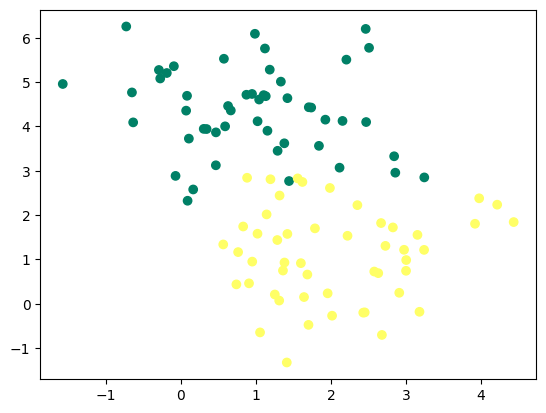

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

0.89


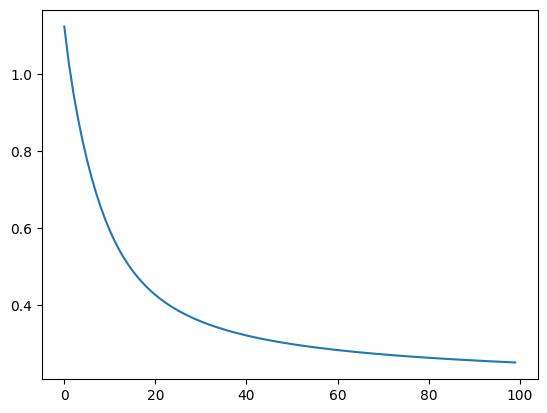

In [ ]:
W, b = artificial_neuron(X, y)

# Reseau avec 2 neurones

##initialisation

In [ ]:
def initialisation(n0, n1, n2):
#n0: nombre d'entrées du réeseau
#n1: nombre de neurones dans la cuche 1
#n2: nombre de neurones dans la couche 2(sortie)
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

##forward_propagation == Model

In [ ]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

##back_propagation ==gradients

In [ ]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

##update

In [ ]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

##Predict

In [ ]:
def predict (X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']# activation final
  return A2 >=0.5

##neural_network === algorithme de la descente de gradient

In [ ]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]# nbre de variable dans x ou x_train
    n2 = y.shape[0] # nbre de variable dans y ou y_train
    #n1 nbre de neurones qu'on desire avoir dans notre premiére couche
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

##Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


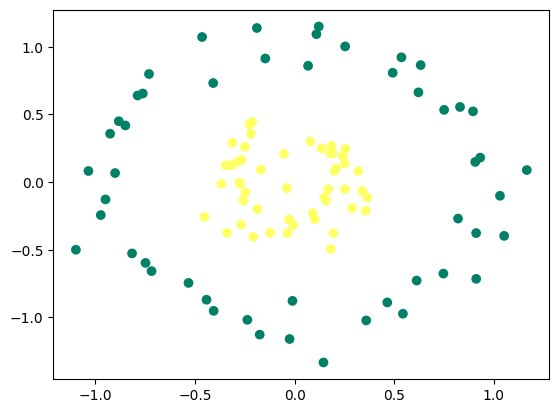

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cf

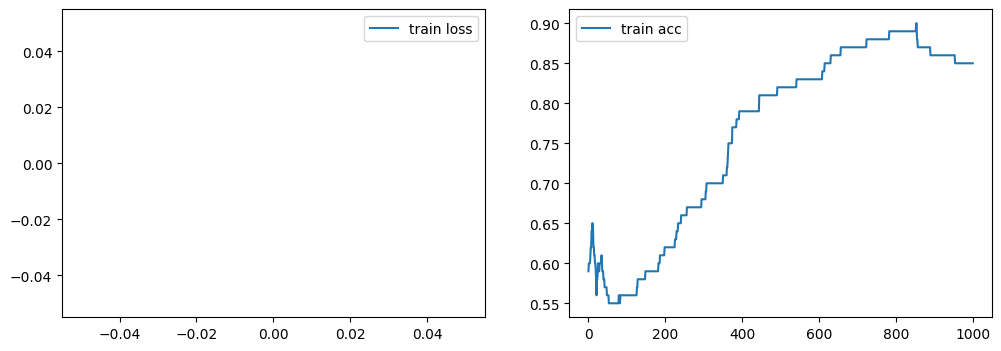

In [ ]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cf

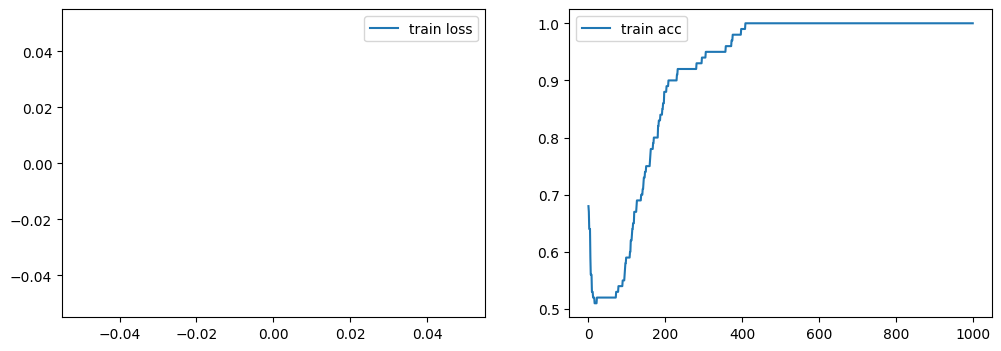

{'W1': array([[ 1.80212588,  0.37821374],
        [ 1.01147118,  2.72196966],
        [ 2.58920092, -1.12112355],
        [ 1.0508304 , -0.23999551],
        [-0.32911352,  0.61126472],
        [ 0.10449739,  1.5211303 ],
        [ 0.90568599,  0.00334079],
        [ 0.44974817,  0.32479341],
        [ 2.19228574, -0.55199865],
        [ 0.07362119, -0.72521454],
        [-2.55294805,  0.64962759],
        [ 0.79621311, -0.67148306],
        [ 2.47060832, -1.49806086],
        [-0.08319614, -0.07417017],
        [ 1.61979578,  1.66597748],
        [ 0.1398299 ,  0.38577941],
        [-1.5500226 , -2.61344251],
        [-0.19459163,  0.0227914 ],
        [ 1.3320316 ,  1.1949539 ],
        [-0.71462983, -0.02385873],
        [-1.23999647, -2.47955126],
        [-2.07311228,  2.57822617],
        [-0.31829059, -0.65082684],
        [-1.46140776,  0.96926358],
        [-2.59100928, -0.09863181],
        [-0.78361708,  0.24660244],
        [-0.63362911, -1.18964448],
        [ 0.17256072, 

In [ ]:
neural_network(X, y, n1=32)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cfd441bf>:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-26-f5a3cf

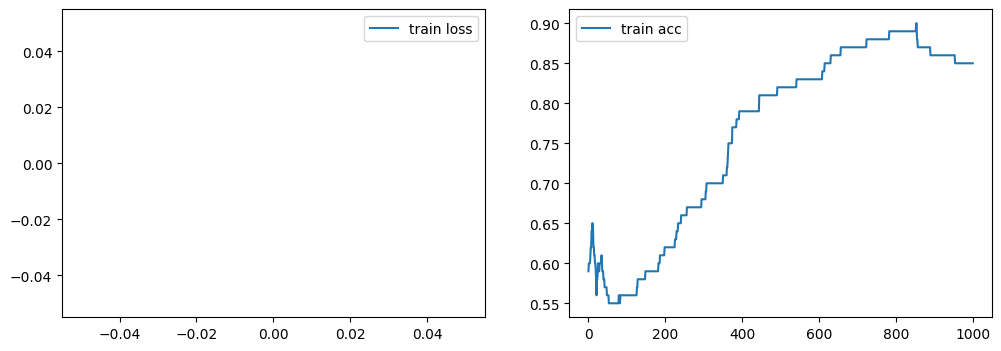

In [ ]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

##Avec plusieurs neurone

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [ ]:
def initialisation(dimensions):

    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [ ]:
def forward_propagation(X, parametres):

  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

In [ ]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [ ]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [ ]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):

    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

dimensions de X: (2, 100)
dimensions de y: (1, 100)


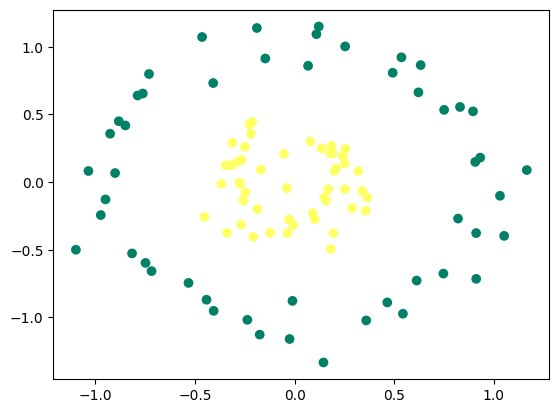

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:06<00:00, 452.48it/s]


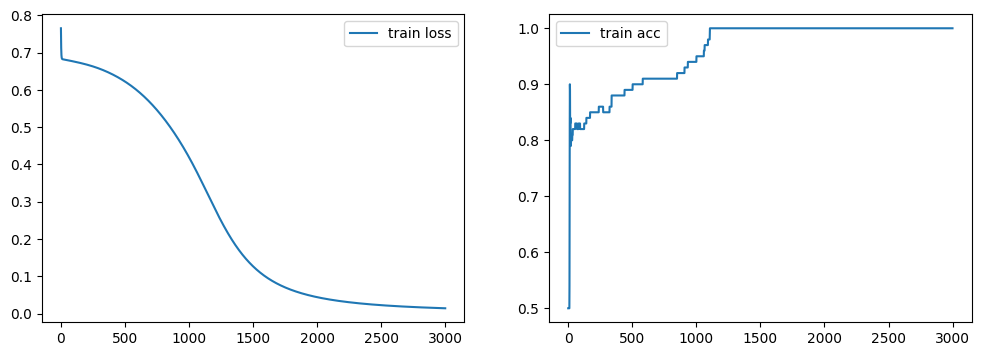

array([[0.76537816, 0.5       ],
       [0.73318091, 0.5       ],
       [0.71304419, 0.5       ],
       ...,
       [0.01403589, 1.        ],
       [0.01402475, 1.        ],
       [0.01401363, 1.        ]])

In [ ]:
deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

#Tensorflow et Keras

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist#28*28 images of hand written digits 0-9
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

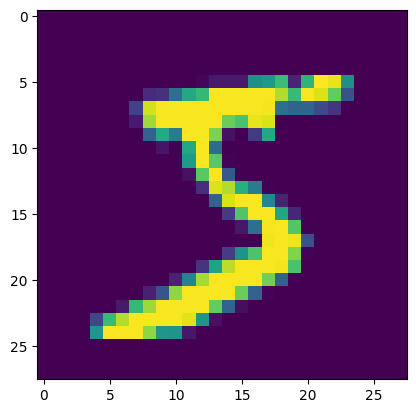

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
#print(x_train[0])

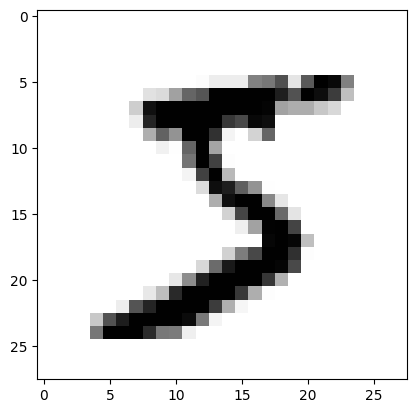

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
mnist = tf.keras.datasets.mnist#28*28 images of hand written digits 0-9
(x_train, y_train), (x_test, y_test) =  mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
y_test =  tf.keras.utils.normalize(x_test, axis=1)

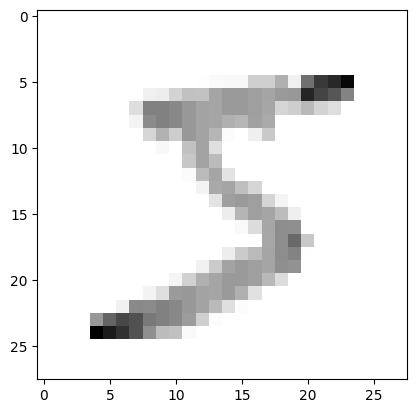

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
mnist = tf.keras.datasets.mnist#28*28 images of hand written digits 0-9
(x_train, y_train), (x_test, y_test) =  mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
y_test =  tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2604 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1081 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0744 - accuracy: 0.9762


In [ ]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(x_train, y_train, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 5ms/step - loss: 0.0568 - accuracy: 0.9822
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0435 - accuracy: 0.9860
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0332 - accuracy: 0.9893


In [ ]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('Test accuracy:', test_acc)

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-61-7d3d37966e47>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [25088]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_201509]

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-61-7d3d37966e47>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [25088]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_201509]

In [ ]:
model.save('epic_num_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions)

[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(predictions[:10])
print(y_test[:10])

[[0.         0.         0.         0.         0.         0.
  0.         0.99999994 0.         0.        ]
 [0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.99999994]
 [0.         0.         0.         0.         0.         0.99999994
  0.         0.         0.         0.        ]
 [0.         0.         0.   

In [ ]:
import numpy as np
print(np.argmax(predictions[0]))

7


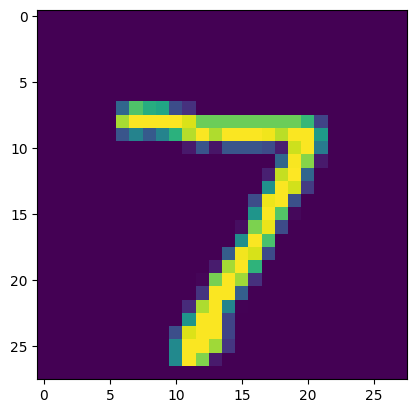

In [ ]:
plt.imshow(x_test[0])
plt.show()

#CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

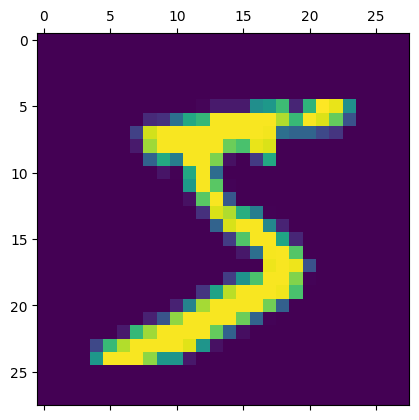

In [ ]:
plt.matshow(x_train[0])

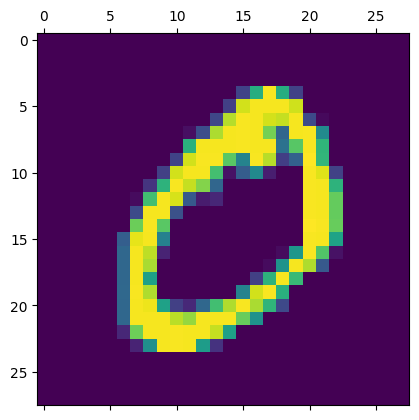

In [ ]:
plt.matshow(x_train[1])

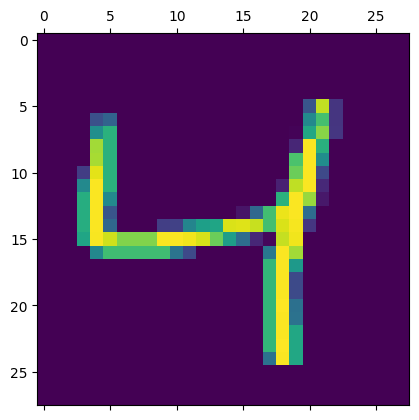

In [ ]:
plt.matshow(x_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.reshape(len(x_train),28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid')
])
model.compile(
    optimizer= 'adam',
     loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8390 - accuracy: 0.8411
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.0246 - accuracy: 0.8798
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7129 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5591 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4918 - accuracy: 0.8846


##Scaling

In [ ]:
X_train =x_train/255
X_test =x_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid')
])
model.compile(
    optimizer= 'adam',
     loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9250


[0.2674355208873749, 0.925000011920929]

In [ ]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


array([[1.78509206e-02, 4.76302205e-07, 4.07465138e-02, ...,
        9.99761403e-01, 1.13231815e-01, 6.94365740e-01],
       [4.08008486e-01, 1.02236848e-02, 9.99636054e-01, ...,
        8.92362844e-13, 2.24356070e-01, 3.74032716e-09],
       [3.83425737e-04, 9.94122207e-01, 6.27688229e-01, ...,
        1.38870224e-01, 4.27304000e-01, 4.96431068e-02],
       ...,
       [2.34350046e-06, 4.60128103e-06, 9.18975216e-04, ...,
        2.57508606e-01, 5.96245885e-01, 7.65418947e-01],
       [1.17758522e-04, 1.73143984e-04, 1.58499679e-04, ...,
        4.70414816e-05, 7.61342287e-01, 1.43386831e-04],
       [5.85036818e-03, 3.58798380e-10, 2.18151465e-01, ...,
        1.35639215e-08, 3.34976910e-04, 9.36428876e-07]], dtype=float32)

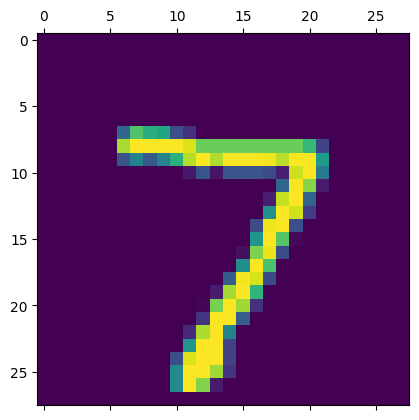

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.78509206e-02, 4.76302205e-07, 4.07465138e-02, 9.42079008e-01,
       2.02669948e-03, 1.13472678e-01, 1.68275210e-06, 9.99761403e-01,
       1.13231815e-01, 6.94365740e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

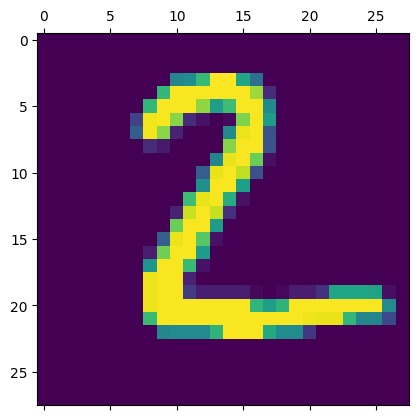

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted= model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([4.0800849e-01, 1.0223685e-02, 9.9963605e-01, 3.7106693e-01,
       8.3934015e-10, 9.0041685e-01, 8.9569145e-01, 8.9236284e-13,
       2.2435607e-01, 3.7403272e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels= [np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cnn = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cnn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    1,    0,    8,    8,    4,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   11,  918,   13,    7,    6,   13,   10,   48,    3],
       [   3,    0,   17,  896,    0,   38,    2,   12,   35,    7],
       [   1,    1,    4,    1,  920,    0,   10,    4,   10,   31],
       [  10,    3,    3,   18,   10,  787,   13,    7,   34,    7],
       [   8,    3,    6,    0,    7,   15,  911,    2,    6,    0],
       [   1,    5,   22,    5,    6,    1,    0,  948,    5,   35],
       [   4,    6,    5,   14,    9,   18,    9,   12,  891,    6],
       [   9,    7,    1,    7,   29,    7,    0,   23,   10,  916]],
      dtype=int32)>

AttributeError: QuadMesh.set() got an unexpected keyword argument 'fat'

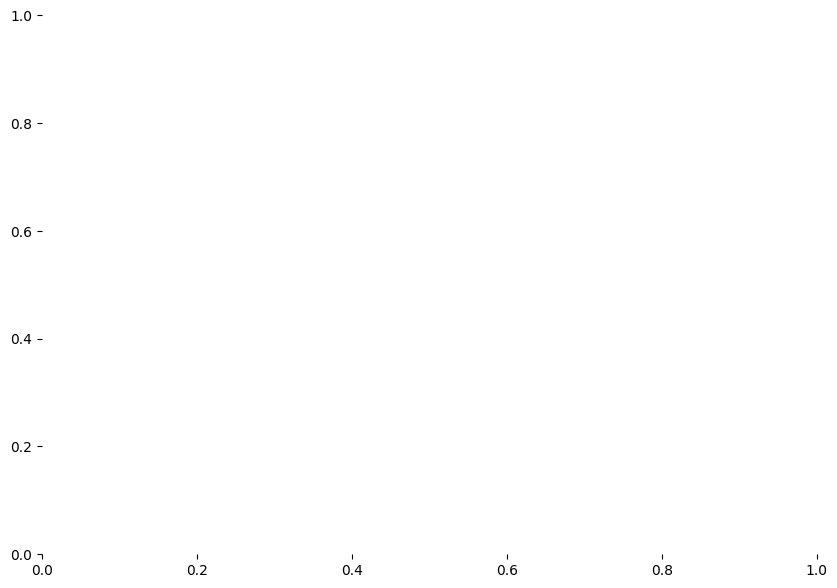

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cnn,  annot=True, fat='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation= 'relu'),
     keras.layers.Dense(10, activation= 'sigmoid')
])
model.compile(
    optimizer= 'adam',
     loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1275 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0686 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0556 - accuracy: 0.9828


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0869 - accuracy: 0.9732


[0.08688550442457199, 0.9732000231742859]

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation= 'relu'),
     keras.layers.Dense(10, activation= 'sigmoid')
])
model.compile(
    optimizer= 'adam',
     loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2748 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1254 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9835


#CNN INTEGRATILY

##1.Setup and Load Data

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.6601751740000736
GPU (s):
0.1050633369999332
GPU speedup over CPU: 34x


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-b

In [ ]:
os.path.join('data', 'happy')

'data/happy'

In [ ]:
#os.listdir('data')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
import tensorflow as tf
import os
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(gpus)

1

In [ ]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
len(cpus)

1

##2. Remove dodgy images

In [ ]:
import cv2
import imghdr
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data'

##3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('data')
Found 305 files belonging to 2 classes.
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

SyntaxError: invalid syntax (<ipython-input-6-7927145d8925>, line 4)